# Practical Time Series Analysis & Forecast

## Name: Chrispine Tot

### Student ID: 1637159abc01f000

- Importing the required libraries

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import missingno as msno
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt   
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from prophet import Prophet
%matplotlib inline

- Loading our data into a Pandas dataframe
- Inspecting the first 5 rows of our dataframe

In [2]:
data = pd.read_csv("/kaggle/input/electricity-prices/Time_series_analysis_and_forecast_DATASET.csv")
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


- Inspecting the shape of our dataframe

In [172]:
data.shape

(92016, 5)

In [173]:
data.dtypes

FullDate      object
Tmax         float64
SysLoad      float64
GasPrice     float64
ElecPrice    float64
dtype: object

- Visually checking for missing data using the **missingno** library

<AxesSubplot:>

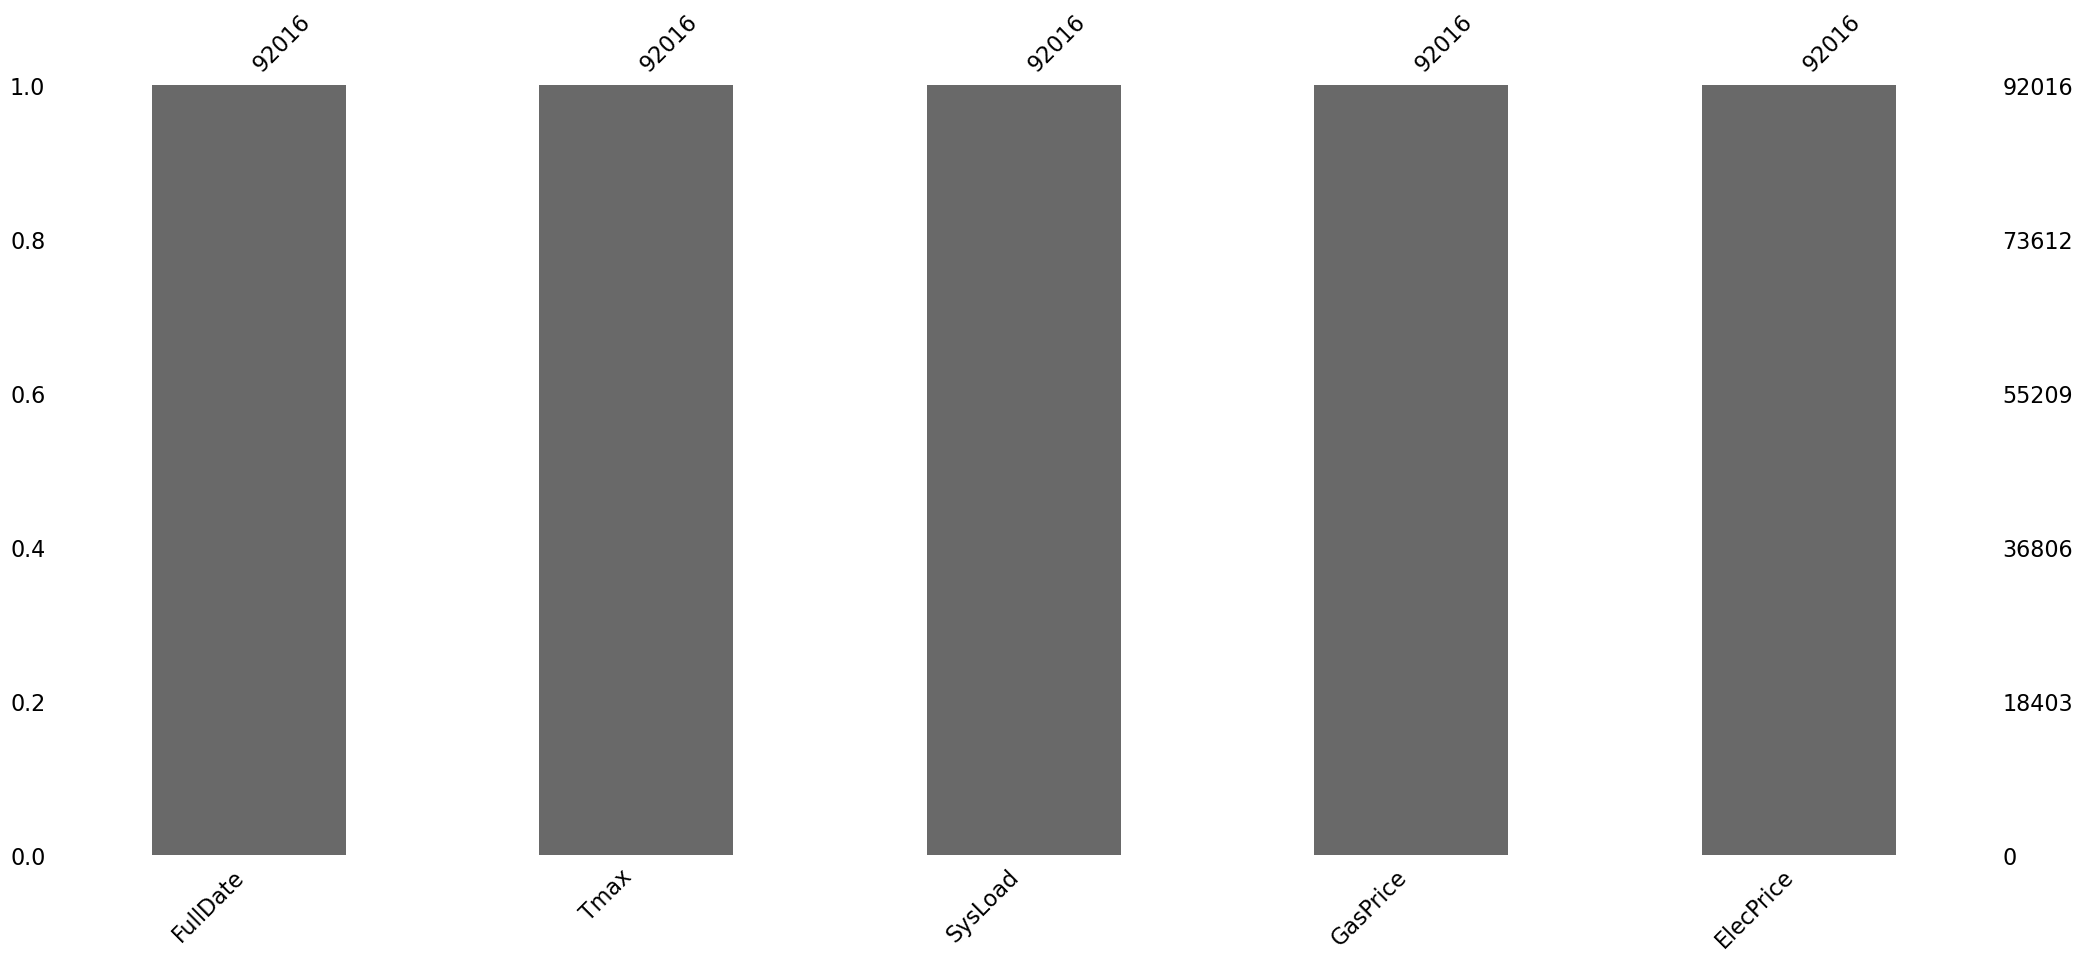

In [3]:
msno.bar(data)

- Confirming no presence of missing values using the **isna()** function

In [4]:
data.isna().any()

FullDate     False
Tmax         False
SysLoad      False
GasPrice     False
ElecPrice    False
dtype: bool

- No missing data present in our dataset
- Further inspection of the dataset using the **describe()** function

In [5]:
data.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


- Conveting the **"FullDate"** column to date-time
- Renaming the **"FullDate"** column to **"ds"**
- Renaming the **"ElecPrice"** column to **"y"**

In [6]:
data['FullDate'] = pd.to_datetime(data.FullDate)
data = data.rename(columns={"FullDate" : "ds" , "ElecPrice" : "y" }) 
data.set_index('ds', inplace=True)
data.head()

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


- Creating a deep copy of our pandas datafreame to avoid alteration on the wrangled data

In [7]:
d_copy = data.copy()
d_copy.head()

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


- Resampling the daily data to a daily sampling rate to answer **Question 11**

In [8]:
data_daily = d_copy.resample('D').sum()
print(data_daily.shape)
data_daily.head(10)

(3834, 4)


,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01,379.2,41565.380,88.5600,2751.700
2010-09-02,369.6,38898.990,88.5600,570.810
2010-09-03,439.2,41665.760,106.8000,504.975
2010-09-04,328.8,35638.085,81.3600,502.275
2010-09-05,357.6,35611.410,106.8000,500.555
2010-09-06,350.4,42747.865,79.4400,667.190
2010-09-07,410.4,41837.245,84.2400,664.570
2010-09-08,446.4,37608.775,114.4776,490.390
2010-09-09,470.4,37351.660,82.5600,507.040


- **Plotting** the daily global_active_power over time

Text(0, 0.5, 'ElecPrice')

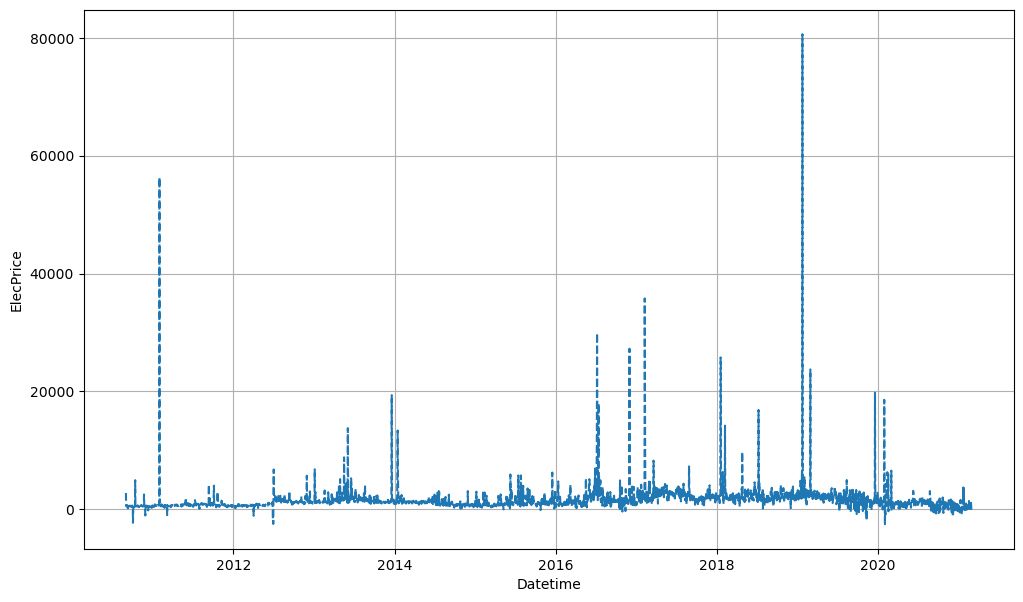

In [9]:
plt.figure(figsize=(12,7))
plt.plot(data_daily.index, data_daily.y, '--')
plt.grid()
plt.xlabel('Datetime')
plt.ylabel('ElecPrice')

- **P value** of **Sysload** using Augmented Dicky Fuller test (ADF)

In [10]:
sysload_adf = adfuller(data_daily['SysLoad'])
print(f'p-value of the SysLoad: {round(sysload_adf[1],6)}')

p-value of the SysLoad: 0.004254


- **P value** of **GasPrice** using Augmented Dicky Fuller test (ADF)

In [11]:
gasprice_adf = adfuller(data_daily['GasPrice'])
print(f'p-value of the GasPrice: {round(gasprice_adf[1],6)}')

p-value of the GasPrice: 0.045027


- **Computing** the critical values

- **Gas price** critical values:

In [12]:
adf_gasprice = adfuller(data_daily['GasPrice'])
print(f'ADF Statistic: {round(adf_gasprice[0],4)}')
print('Critical Values:')
for k, v in adf_gasprice[4].items():
  print(f'   {k}: {round(v, 4)}')

ADF Statistic: -2.9028
Critical Values:
   1%: -3.4321
   5%: -2.8623
   10%: -2.5672


- **Elec Price** critical values:

In [13]:
# Elec Price
adf_elecprice = adfuller(data_daily['y'])
print(f'ADF Statistic: {round(adf_elecprice[0],4)}')
print('Critical Values:')

for k, v in adf_elecprice[4].items():
 print(f'{k} : {round(v, 4)}') 

ADF Statistic: -8.2691
Critical Values:
1% : -3.4321
5% : -2.8623
10% : -2.5672


- **Splitting** training and test data

In [14]:
# Rest the index
data_daily.reset_index(inplace=True)

#Split the dataset
train = data_daily.iloc[:2757,:]
test = data_daily.iloc[2757:,:]

train.shape

(2757, 5)

- **Inspecting** training data

In [15]:
train.head()
train.shape

(2757, 5)

- **Inspecting** testing data

In [16]:
test.head()
test.shape

(1077, 5)

- **Defining** MAPE function

In [17]:
# Defining the MAPE function
def mape(y, yhat):
  y = y.reset_index(drop=True)
  return round(np.mean(np.abs((y - yhat)/y)*100),2)

- Instantiating the model
- Fitting the model using the training data

#### **Univariate Analysis**

### Model 1

In [18]:
model_1 = Prophet()
model_1.fit(train)

07:17:37 - cmdstanpy - INFO - Chain [1] start processing
07:17:38 - cmdstanpy - INFO - Chain [1] done processing


- Predicting the target variable using the test data
- Evaluating model performance using **MAPE** 

In [19]:
pred1 = model_1.predict(test) 
mape(test['y'],pred1['yhat'])

544.73

- Evaluating model performance using **RMSE** 

In [21]:
rmse = np.sqrt(metrics.mean_squared_error(np.array(test['y']),np.array(pred1['yhat'])))

print('The Root Mean Square Error(rmse) of the first model is : %s' %(round(rmse,2)))

The Root Mean Square Error(rmse) of the first model is : 3208.06


- Plotting the components from the forecasted model to determine the **month** with the **highest value**

Answer: **July**

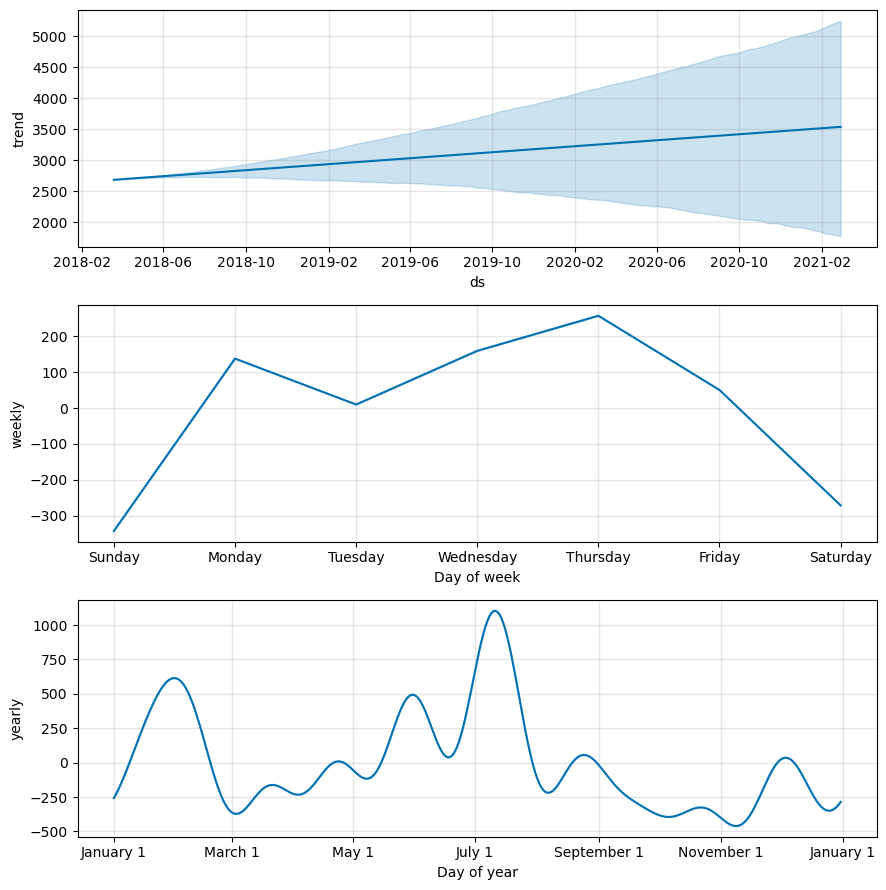

In [22]:
model_1.plot_components(pred1) 
plt.show()

- Creating a new variable with the renamed columns

In [23]:
new_df = data_daily.rename(columns={"SysLoad" : "add1" , "Tmax" : "add2", "GasPrice" : "add3" })
new_df.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


- Splitting the data into testing and training data

In [25]:
# assign train and test data
train2 = new_df[:2757]
test2 = new_df[2757:]
print('train shape', train2.shape)
print('test shape', test2.shape)

train shape (2757, 5)
test shape (1077, 5)


#### **Multivariate Analysis**

### Model 2

In [26]:
model2 = Prophet()

model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')

- **Fitting** our second model

In [27]:
model2.fit(train2)

07:46:14 - cmdstanpy - INFO - Chain [1] start processing
07:46:14 - cmdstanpy - INFO - Chain [1] done processing


- Evaluating the performance of the second model using **MAPE**

In [28]:
pred2 = model2.predict(test2) 
mape(test['y'],pred2['yhat'])

231.91

- Evaluating the performance of the second model using **RMSE**

In [30]:
rmse2 = np.sqrt(metrics.mean_squared_error(np.array(test['y']),np.array(pred2['yhat'])))

print('The Root Mean Square Error(rmse) of the second model is : %s' %(round(rmse2,2)))

The Root Mean Square Error(rmse) of the second model is : 2707.61


- Plotting the components from the multivariate forecasted model to find out what **day** of the daily seasonality has the **highest value**

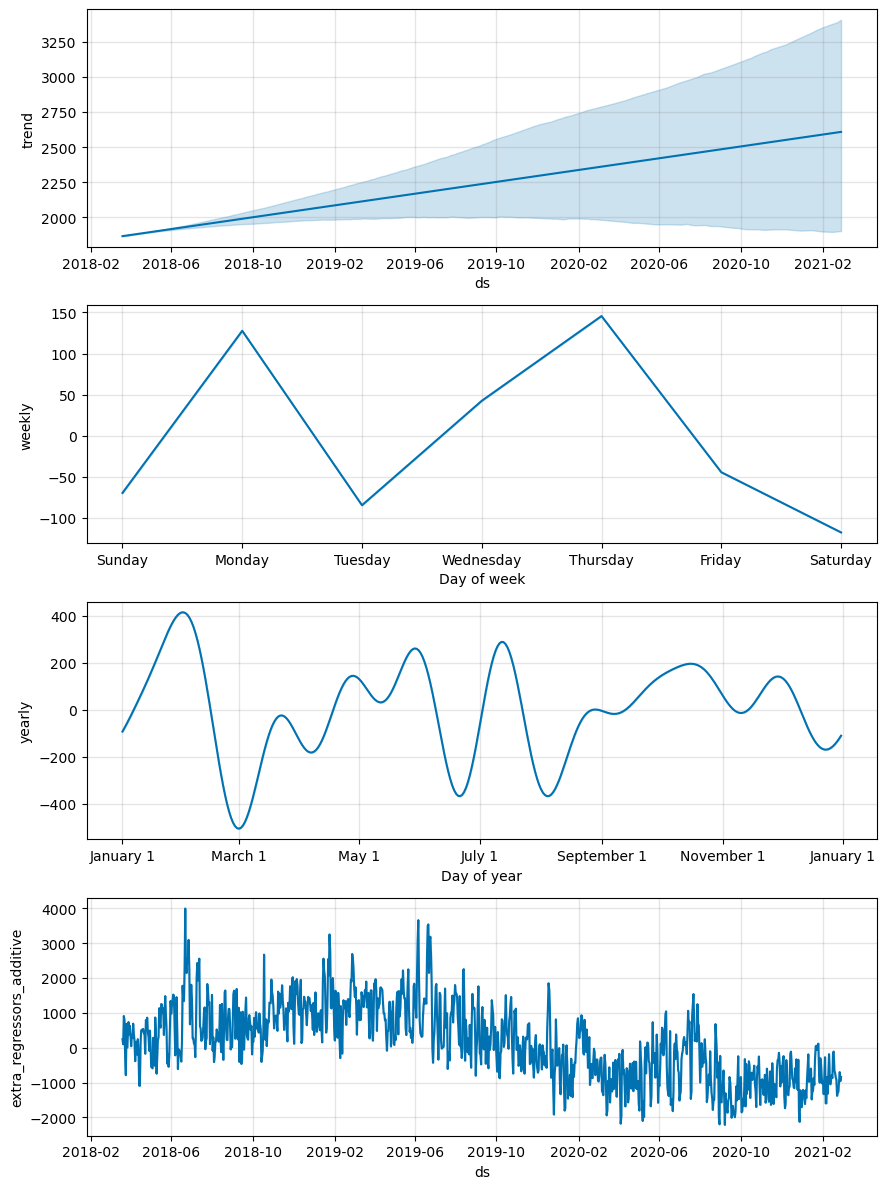

In [31]:
model2.plot_components(pred2) 
plt.show()

In [92]:
# Split the dataset
train3 = new_df.iloc[:2757,:]
test3 = new_df.iloc[2757:,:]
train3.shape , test3.shape

((2757, 5), (1077, 5))

### Model 3

In [32]:
mv_df2 = data_daily.rename(columns={"SysLoad" : "add1" , "Tmax" : "add2", "GasPrice" : "add3" })
mv_df2.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


- **Dropping** the **Tnmax (add2)** column

In [33]:
mv_df2= mv_df2.drop(["add2"], axis=1)
mv_df2.head()

,ds,add1,add3,y
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


- **Inspecting** the new dataframe

In [34]:
mv_df2.head()

,ds,add1,add3,y
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


In [35]:
mv_df2.shape

(3834, 4)

- Splitting the training and testing data
- **Inspecting** the training and testing data

In [36]:
train2 = mv_df2.iloc[:2757,:]
test2 = mv_df2.iloc[2757:,:]

In [37]:
print(train2.shape)
print(test2.shape)

(2757, 4)
(1077, 4)


- **Instantiating** our model
- **Fitting** our model

In [38]:
model_3 = Prophet()
model_3.add_regressor("add1")
model_3.add_regressor("add3")
model_3.fit(train2)

08:02:18 - cmdstanpy - INFO - Chain [1] start processing
08:02:18 - cmdstanpy - INFO - Chain [1] done processing


- **Predicting** the target variable using our model

In [39]:
pred3 = model_3.predict(test2)

- **Evaluating** mode performance using **MAPE**

In [40]:
mape(test['y'],pred3['yhat'])

235.11

- **Evaluating** mode performance using **RMSE**

In [42]:
rmse3 = np.sqrt(metrics.mean_squared_error(np.array(test['y']),np.array(pred3['yhat'])))

print('The Root Mean Square Error(rmse) of the third model is : %s' %(round(rmse3,2)))

The Root Mean Square Error(rmse) of the third model is : 2711.21


- **Plotting** the components

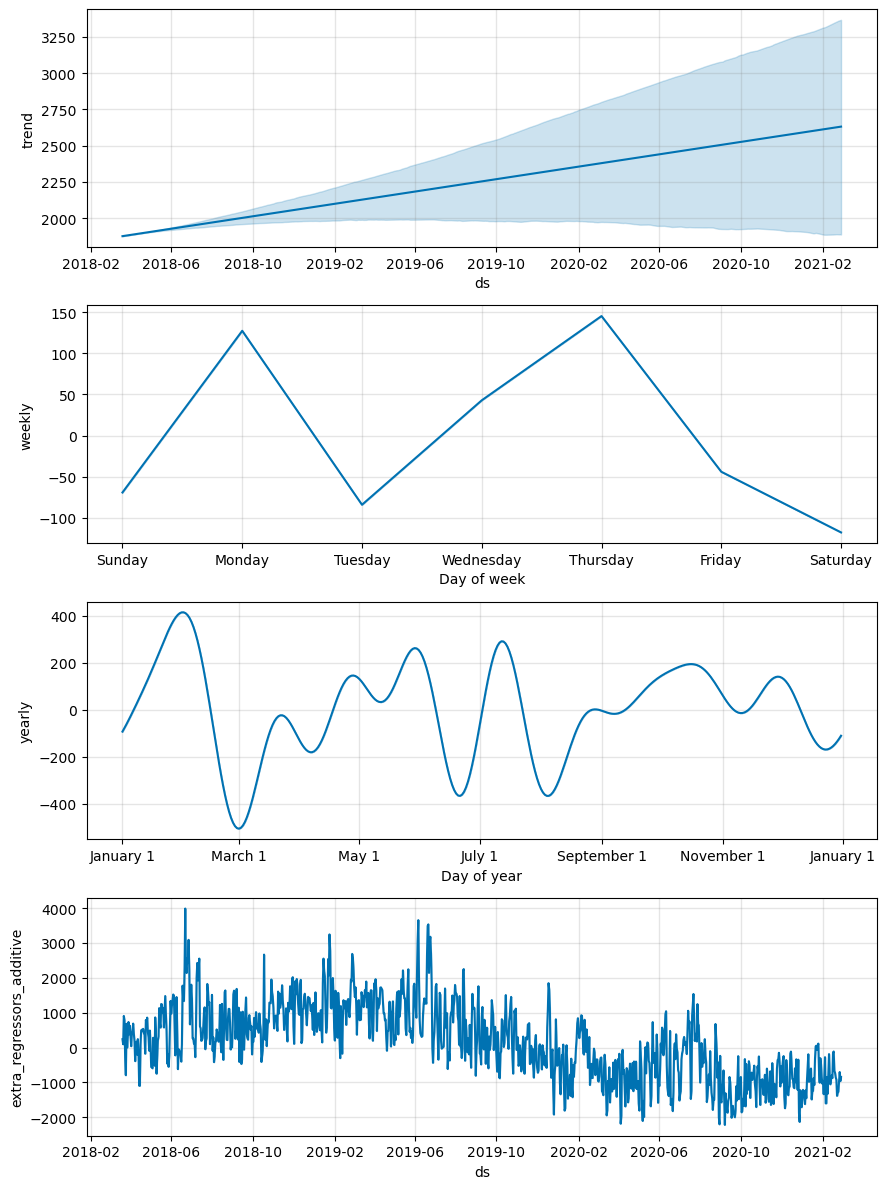

In [43]:
model_3.plot_components(pred3) 
plt.show()